# Diabetes dataset

## About Dataset

Details about the dataset:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data set

In [2]:
df = pd.read_csv(r"C:\Data Science\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

Examining the outcome variable

In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.Outcome.value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [9]:
df.groupby("Outcome").agg({"Insulin":"mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [10]:
df.groupby("Outcome").agg({"Glucose":"mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [11]:
df.groupby("Outcome").agg({"Insulin":"max"})

,Insulin
Outcome,
0,744
1,846


In [12]:
df.groupby("Outcome").agg({"Glucose":"max"})

,Glucose
Outcome,
0,197
1,199


In [13]:
df.groupby("Outcome").agg({"SkinThickness":"mean"})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


Visualizing the outcome variable

<Axes: ylabel='Outcome'>

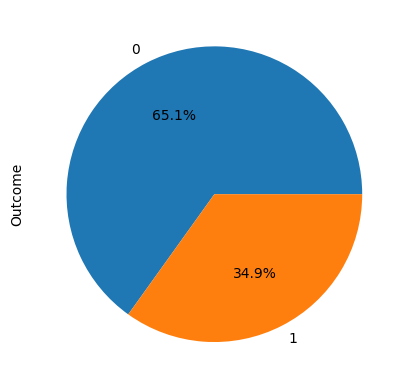

In [14]:
df.Outcome.value_counts().plot(kind="pie",autopct='%1.1f%%')

Examing the correlation among various attributes

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
#plt.imshow(df.corr(),cmap="magma")

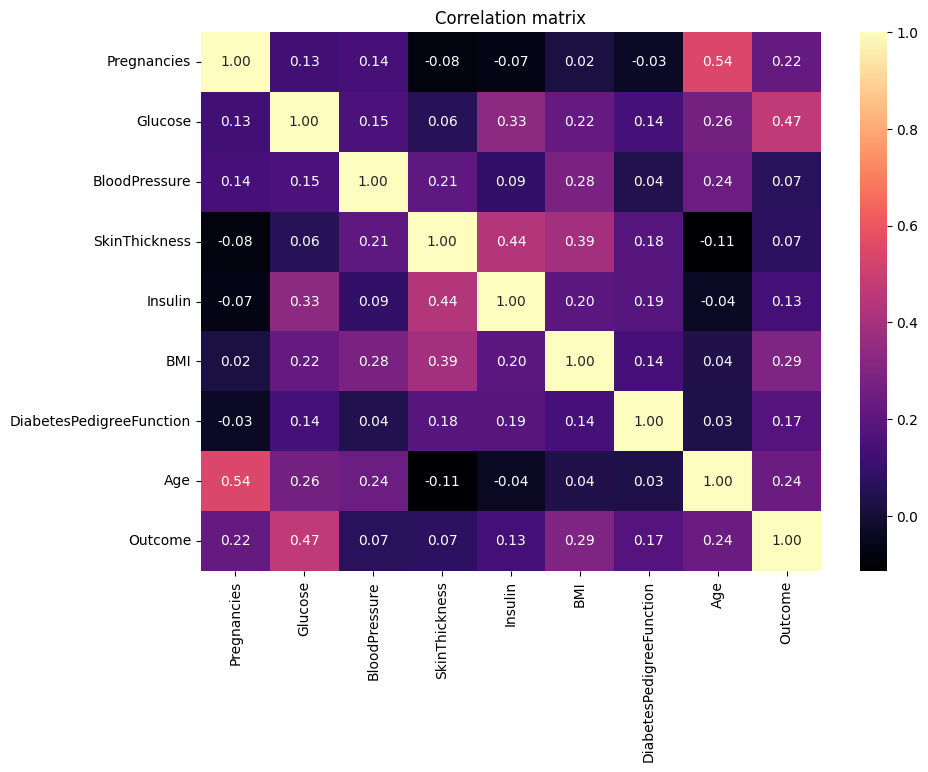

In [17]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="magma")
plt.title("Correlation matrix")
plt.show()

## Data Preprocessing

In [18]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df1 = df.copy()

In [20]:
df1[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df1[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan) 

In [21]:
df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [22]:
import missingno as msno

<Axes: >

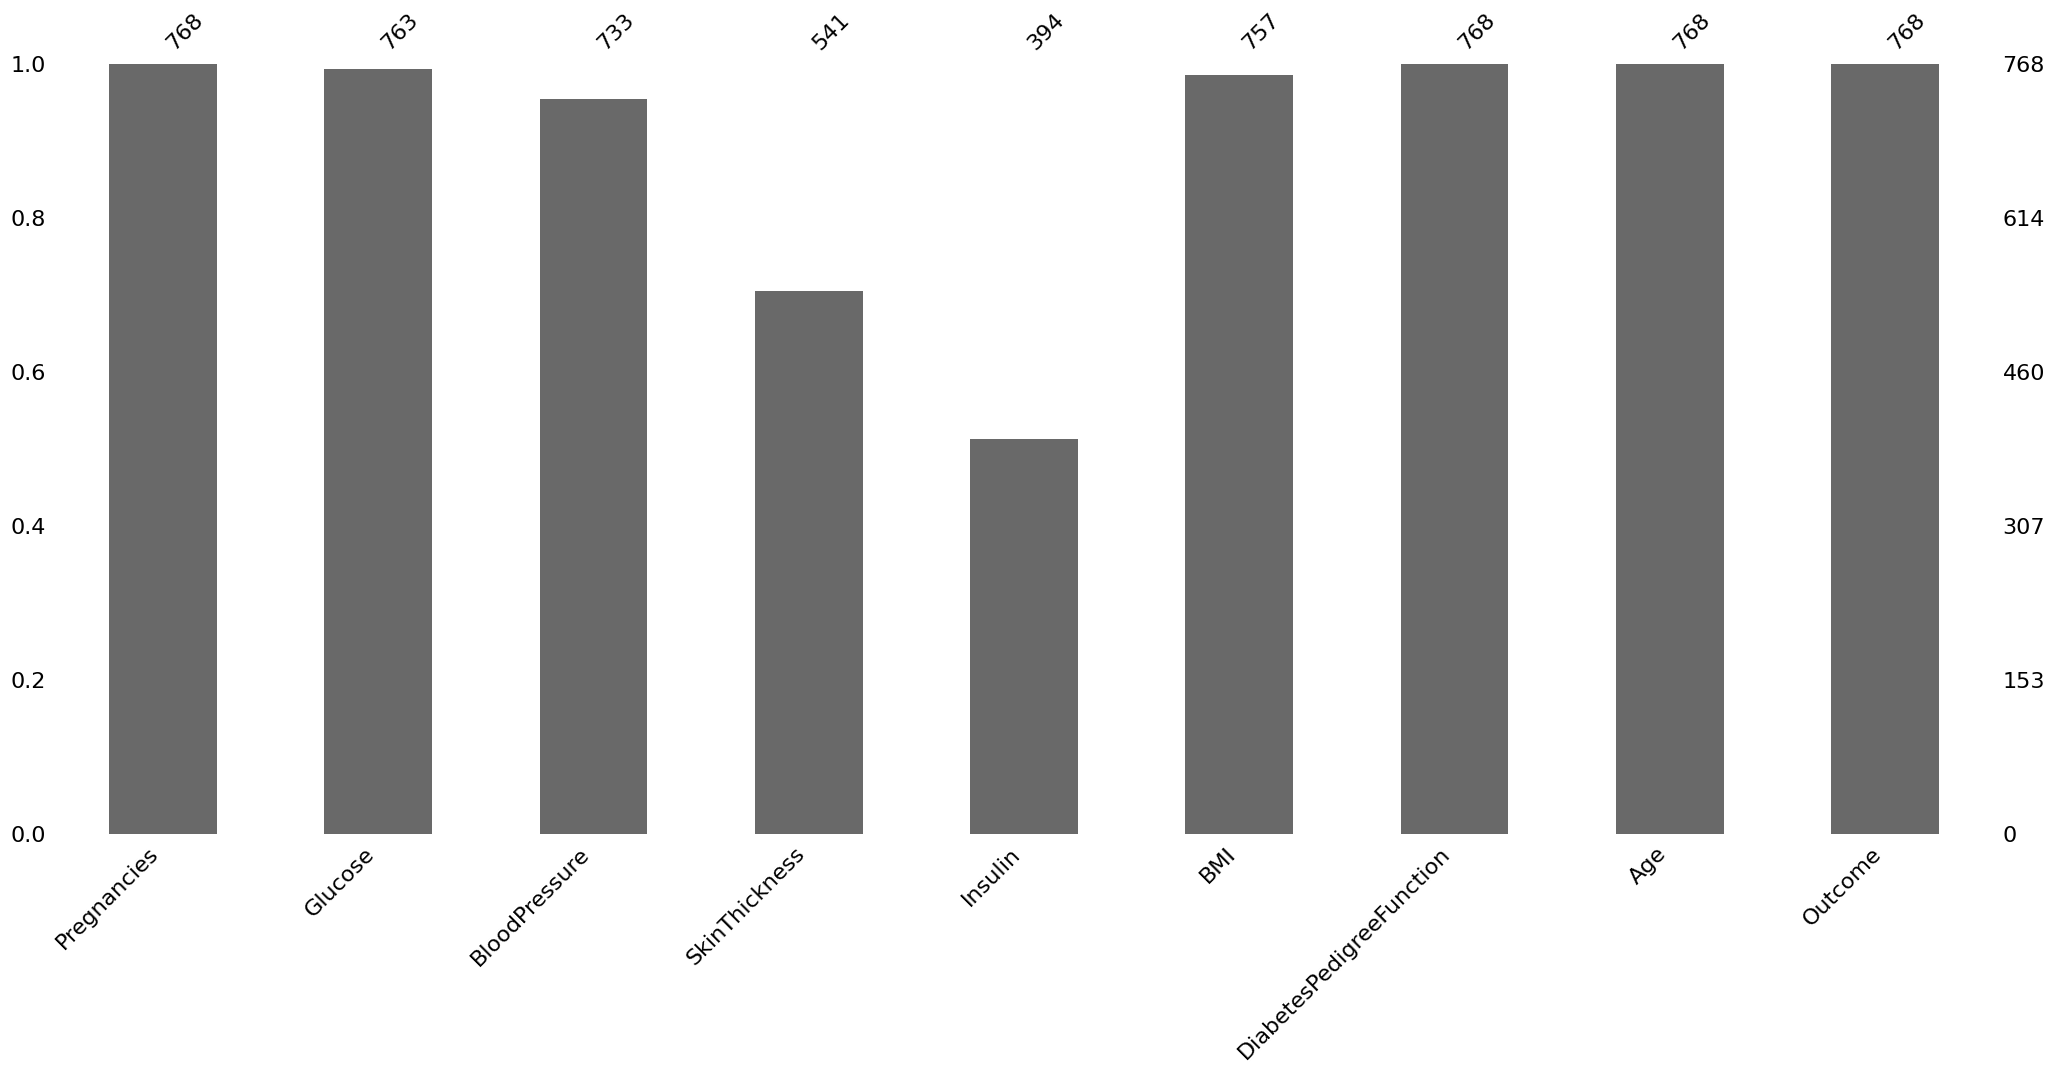

In [23]:
msno.bar(df1)

## Filling in missing values

Filling in the missing values using MEDIAN based on groupby function on OUTCOME variable

In [24]:
#glucose
data = df1.groupby("Outcome").agg({"Glucose":"median"})
glucose_0 = data.Glucose[0]
glucose_1 = data.Glucose[1]
#BP
data = df1.groupby("Outcome").agg({"BloodPressure":"median"})
bp_0 = data.BloodPressure[0]
bp_1 = data.BloodPressure[1]
#Skin thickness
data1 = df1.groupby("Outcome").agg({"SkinThickness":"median"})
st_0 = data1.SkinThickness[0]
st_1 = data1.SkinThickness[1]
#insulin
data2 = df1.groupby("Outcome").agg({"Insulin":"median"})
insulin_0 = data2.Insulin[0]
insulin_1 = data2.Insulin[1]
#bmi
data3 = df1.groupby("Outcome").agg({"BMI":"median"})
BMI_0 = data3.BMI[0]
BMI_1 = data3.BMI[1]

In [25]:
df2  = df1[df1["Outcome"]==0]
df3 = df1[df1["Outcome"]==1]

In [26]:
df2["Glucose"] = df2["Glucose"].fillna(glucose_0)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\1314126552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Glucose"] = df2["Glucose"].fillna(glucose_0)


In [27]:
df2["BloodPressure"] = df2["BloodPressure"].fillna(bp_0)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\3162487767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BloodPressure"] = df2["BloodPressure"].fillna(bp_0)


In [28]:
df2["SkinThickness"] = df2["SkinThickness"].fillna(st_0)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\2183968725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SkinThickness"] = df2["SkinThickness"].fillna(st_0)


In [29]:
df2["Insulin"] = df2["Insulin"].fillna(insulin_0)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\3168533119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Insulin"] = df2["Insulin"].fillna(insulin_0)


In [30]:
df2["BMI"] = df2["BMI"].fillna(BMI_0)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\1813694662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BMI"] = df2["BMI"].fillna(BMI_0)


In [31]:
df3["Glucose"] = df3["Glucose"].fillna(glucose_1)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\966636894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Glucose"] = df3["Glucose"].fillna(glucose_1)


In [32]:
df3["BloodPressure"] = df3["BloodPressure"].fillna(bp_1)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\4144700441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BloodPressure"] = df3["BloodPressure"].fillna(bp_1)


In [33]:
df3["SkinThickness"] = df3["SkinThickness"].fillna(st_1)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\1563535984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["SkinThickness"] = df3["SkinThickness"].fillna(st_1)


In [34]:
df3["Insulin"] = df3["Insulin"].fillna(insulin_1)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\2685424497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Insulin"] = df3["Insulin"].fillna(insulin_1)


In [35]:
df3["BMI"] = df3["BMI"].fillna(BMI_1)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_4384\291238547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BMI"] = df3["BMI"].fillna(BMI_1)


In [36]:
df3.shape

(268, 9)

In [37]:
df4 = pd.concat([df2,df3])

In [38]:
df4
df4.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

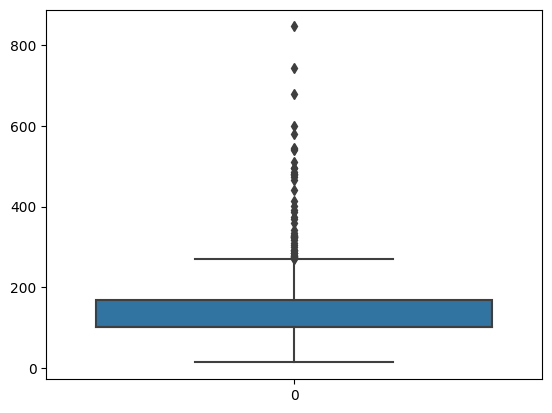

In [39]:
sns.boxplot(df4["Insulin"])

## Outlier Analysis

In [40]:
for feature in df:
    
    Q1 = df4[feature].quantile(0.25)
    Q3 = df4[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    
    if df4[(df4[feature]>upper)].any(axis=None):
        print(feature,"Yes")
    else:
        print(feature,"No")

Pregnancies Yes
Glucose No
BloodPressure Yes
SkinThickness Yes
Insulin Yes
BMI Yes
DiabetesPedigreeFunction Yes
Age Yes
Outcome No


In [41]:
df4.shape

(768, 9)

outlier detection only for insulin 

In [42]:
Q1 = df4["Insulin"].quantile(0.25)
Q3 = df4["Insulin"].quantile(0.75)
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

In [43]:
insulin = df4.loc[(df4["Insulin"]>upper),"Insulin"]

In [44]:
insulin.shape

(51,)

## Feature Engineering

In [45]:
#Classifying data of BMI into range based on accepted standards


In [46]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df4["NewBMI"] = NewBMI
df4.loc[df4["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df4.loc[(df4["BMI"] > 18.5) & (df4["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df4.loc[(df4["BMI"] > 24.9) & (df4["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df4.loc[(df4["BMI"] > 29.9) & (df4["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df4.loc[(df4["BMI"] > 34.9) & (df4["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df4.loc[df4["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [47]:
df4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2
10,4,110.0,92.0,27.0,102.5,37.6,0.191,30,0,Obesity 2


In [48]:
#Classifying insulin into normal and abnormal based on its values

In [49]:
def set_insulin(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "normal"
    else:
        return "abnormal"

In [50]:
df4["NewInsulinScore"] = df4.apply(set_insulin,axis=1)

In [51]:
df4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,normal
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,normal
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2,normal
10,4,110.0,92.0,27.0,102.5,37.6,0.191,30,0,Obesity 2,normal


Classifying Gluscose into different types


In [52]:
df4.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
def set_glucose(row):
    if row["Glucose"]<70:
        return "Low"
    elif row["Glucose"]>=70 and row["Glucose"]<=99:
        return "Normal"
    elif row["Glucose"]>=100 and row["Glucose"]<=126:
        return "Overweight"
    else:
        return "High"


In [54]:
df4["NewGlucose"] = df4.apply(set_glucose,axis=1)

In [55]:
df4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,normal,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,normal,Normal
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,normal,Overweight
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2,normal,Overweight
10,4,110.0,92.0,27.0,102.5,37.6,0.191,30,0,Obesity 2,normal,Overweight


## One hot Encoding 

Transfering categorical variables using the get_dummies method

In [56]:
df5 = pd.get_dummies(df4,columns=["NewBMI","NewInsulinScore","NewGlucose"],drop_first=True)

In [57]:
df5.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,0,0,0,1,0,1,0,0,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,0,1,0,0,0,1,0,0,1
10,4,110.0,92.0,27.0,102.5,37.6,0.191,30,0,0,1,0,0,0,1,0,0,1


In [58]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 766
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   NewBMI_Obesity 1          768 non-null    uint8  
 10  NewBMI_Obesity 2          768 non-null    uint8  
 11  NewBMI_Obesity 3          768 non-null    uint8  
 12  NewBMI_Overweight         768 non-null    uint8  
 13  NewBMI_Underweight        768 non-null    uint8  
 14  NewInsulin

In [59]:
categorical_df = df5[["NewBMI_Obesity 1","NewBMI_Obesity 2","NewBMI_Obesity 3","NewBMI_Overweight","NewBMI_Underweight","NewInsulinScore_normal","NewGlucose_Low","NewGlucose_Normal","NewGlucose_Overweight"]]

In [60]:
categorical_df.shape

(768, 9)

## Feature Standardization

In [61]:
Y = df5["Outcome"]

In [62]:
X = df5.drop(["Outcome","NewBMI_Obesity 1","NewBMI_Obesity 2","NewBMI_Obesity 3","NewBMI_Overweight","NewBMI_Underweight","NewInsulinScore_normal","NewGlucose_Low","NewGlucose_Normal","NewGlucose_Overweight"],axis=1)

In [63]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [64]:
X.index

Int64Index([  1,   3,   5,   7,  10,  12,  18,  20,  21,  27,
            ...
            748, 749, 750, 753, 754, 755, 757, 759, 761, 766],
           dtype='int64', length=768)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss = StandardScaler()
X = ss.fit_transform(X)


In [67]:
cols = pd.Series(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [68]:
ind = pd.Series((i for i in range(1,769)),dtype='int64')

In [69]:
X = pd.DataFrame(X,columns=cols,index=ind )

In [70]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
3,0.342981,-0.186474,0.133134,-0.235210,-0.440843,-0.993982,-0.818079,-0.275760
4,1.827813,-0.219321,-0.197495,-0.235210,-0.440843,0.416719,-1.020427,-0.360847
5,0.046014,-0.383555,1.620964,-0.235210,-0.440843,0.751215,-0.848280,-0.275760


In [71]:
X.shape

(768, 8)

In [72]:
X = pd.concat([X,categorical_df],axis=1)

In [73]:
X.shape

(769, 17)

In [74]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.342981,-0.186474,0.133134,-0.235210,-0.440843,-0.993982,-0.818079,-0.275760,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.827813,-0.219321,-0.197495,-0.235210,-0.440843,0.416719,-1.020427,-0.360847,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.046014,-0.383555,1.620964,-0.235210,-0.440843,0.751215,-0.848280,-0.275760,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 1 to 0
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   NewBMI_Obesity 1          768 non-null    float64
 9   NewBMI_Obesity 2          768 non-null    float64
 10  NewBMI_Obesity 3          768 non-null    float64
 11  NewBMI_Overweight         768 non-null    float64
 12  NewBMI_Underweight        768 non-null    float64
 13  NewInsulinScore_normal    768 non-null    float64
 14  NewGlucose_L

In [76]:
X.drop(0,inplace=True)

In [77]:
X.shape

(768, 17)

In [78]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
NewBMI_Obesity 1            1
NewBMI_Obesity 2            1
NewBMI_Obesity 3            1
NewBMI_Overweight           1
NewBMI_Underweight          1
NewInsulinScore_normal      1
NewGlucose_Low              1
NewGlucose_Normal           1
NewGlucose_Overweight       1
dtype: int64

In [79]:
X.drop(768,inplace=True)

In [80]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
NewBMI_Obesity 1            0
NewBMI_Obesity 2            0
NewBMI_Obesity 3            0
NewBMI_Overweight           0
NewBMI_Underweight          0
NewInsulinScore_normal      0
NewGlucose_Low              0
NewGlucose_Normal           0
NewGlucose_Overweight       0
dtype: int64

In [81]:
X["NewBMI_Obesity 1"] = X["NewBMI_Obesity 1"].astype("int64")

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 767
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   NewBMI_Obesity 1          767 non-null    int64  
 9   NewBMI_Obesity 2          767 non-null    float64
 10  NewBMI_Obesity 3          767 non-null    float64
 11  NewBMI_Overweight         767 non-null    float64
 12  NewBMI_Underweight        767 non-null    float64
 13  NewInsulinScore_normal    767 non-null    float64
 14  NewGlucose

In [83]:
features = ["NewBMI_Obesity 2","NewBMI_Obesity 3","NewBMI_Overweight","NewBMI_Underweight","NewInsulinScore_normal","NewGlucose_Low","NewGlucose_Normal","NewGlucose_Overweight"]

In [84]:
for feature in features:
    X[feature] = X[feature].astype("int64")

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 767
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   NewBMI_Obesity 1          767 non-null    int64  
 9   NewBMI_Obesity 2          767 non-null    int64  
 10  NewBMI_Obesity 3          767 non-null    int64  
 11  NewBMI_Overweight         767 non-null    int64  
 12  NewBMI_Underweight        767 non-null    int64  
 13  NewInsulinScore_normal    767 non-null    int64  
 14  NewGlucose

In [86]:
X.shape

(767, 17)

In [87]:
type(Y)

pandas.core.series.Series

In [88]:
Y.drop(767,inplace=True)

In [89]:
Y.shape

(767,)

# Models Implementation

### Test train split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [92]:
X_train.shape

(536, 17)

In [93]:
y_test.shape

(231,)

### KNN Model implementation

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [95]:
Score_K = []

for k in range(2,15):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    
    ywhat = KNN.predict(x_test)
    ytrain = KNN.predict(X_train)
    score_train = f1_score(y_train,ytrain)
    score = f1_score(y_test,ywhat)
    Score_K.append((score.round(4),score_train.round(4),k))
    
    

In [96]:
Score_K

[(0.5496, 0.7778, 2),
 (0.6839, 0.8087, 3),
 (0.6187, 0.7477, 4),
 (0.6792, 0.8108, 5),
 (0.6269, 0.7844, 6),
 (0.6887, 0.8011, 7),
 (0.6286, 0.7605, 8),
 (0.6875, 0.7899, 9),
 (0.6846, 0.756, 10),
 (0.717, 0.7775, 11),
 (0.7383, 0.7478, 12),
 (0.7468, 0.7701, 13),
 (0.7248, 0.756, 14)]

### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
LR = LogisticRegression()

In [99]:
LR.fit(X_train,y_train)

LogisticRegression()

In [100]:
ywhat = LR.predict(x_test)

In [101]:
ytrain = LR.predict(X_train)

In [102]:
score_train = f1_score(ytrain,y_train)

In [103]:
score_test = f1_score(ywhat,y_test)

In [104]:
print("Training data accuracy:",score_train,"Testing data accuracy:",score_test)

Training data accuracy: 0.6416184971098265 Testing data accuracy: 0.6575342465753424


### Applying Cross Validation and observing change in accuracy

In [105]:
from sklearn.model_selection import cross_val_score

For Logcistic Regression model

In [106]:
LR_accuracy = cross_val_score(LR,X,Y,cv=10)

In [107]:
LR_f1 = cross_val_score(LR,X,Y,cv=10,scoring="f1")

In [108]:
LR_roc_auc = cross_val_score(LR,X,Y,cv=10,scoring="roc_auc")

In [109]:
print(np.mean(LR_accuracy))

0.7796992481203008


In [110]:
print(np.mean(LR_f1))

0.6553415385496558


In [111]:
print(np.mean(LR_roc_auc))

0.8545484039769754


For KNN model with k=7

In [112]:
Knn = KNeighborsClassifier(n_neighbors=9)

In [113]:
knn_accuracy = cross_val_score(Knn,X,Y,cv=10,scoring="accuracy")

In [114]:
knn_roc_auc = cross_val_score(Knn,X,Y,cv=10,scoring="roc_auc")

In [115]:
knn_f1 = cross_val_score(Knn,X,Y,cv=10,scoring="f1")

In [116]:
print(np.mean(knn_accuracy))

0.8032296650717704


In [117]:
print(np.mean(knn_roc_auc))

0.8635406709692424


In [118]:
print(np.mean(knn_f1))

0.7072661573110282


### Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
clf = DecisionTreeClassifier(criterion="gini")

In [121]:
clf_accuracy = cross_val_score(clf,X,Y,cv=10) 

In [122]:
clf_f1 = cross_val_score(clf,X,Y,cv=10,scoring="f1") 

In [123]:
clf_roc_auc = cross_val_score(clf,X,Y,cv=10,scoring="roc_auc") 

In [124]:
print(np.mean(clf_accuracy))

0.8501367053998633


In [125]:
print(np.mean(clf_f1))

0.7757595627052287


In [126]:
print(np.mean(clf_roc_auc))

0.8348338275481133


## Hypertuning for Decision tree classifier

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
params={
    "criterion":["gini","entropy"],
    "max_depth":[None,2,4,6,8,10],
    "splitter":["random","best"],
}

In [129]:
clf_best = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid = params,
        cv = 10,
)

In [130]:
clf_best.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [131]:
clf_best.best_params_


{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

Measuring the accuracy using best paramters

In [132]:
clf_1 = DecisionTreeClassifier(criterion="entropy",splitter='best')

In [133]:
clf_1_accuracy = cross_val_score(clf,X,Y,cv=10) 

In [134]:
print(np.mean(clf_1_accuracy))

0.8501367053998633


In [135]:
clf_1_f1 = cross_val_score(clf,X,Y,cv=10,scoring="f1") 

In [136]:
print(np.mean(clf_1_f1))

0.7827575255551424


In [137]:
clf_1_roc = cross_val_score(clf,X,Y,cv=10,scoring="roc_auc") 

In [138]:
print(np.mean(clf_1_roc))

0.8340384906099192


### Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rfc = RandomForestClassifier(n_estimators=100)

In [141]:
rfc_accuracy = cross_val_score(rfc,X,Y,cv=10)

In [142]:
print(np.mean(rfc_accuracy))

0.878861927546138


In [143]:
rfc_f1 = cross_val_score(rfc,X,Y,cv=10,scoring="f1")

In [144]:
rfc_roc_auc = cross_val_score(rfc,X,Y,cv=10,scoring="roc_auc")

In [145]:
print(np.mean(rfc_f1))

0.823795669756261


In [146]:
print(np.mean(rfc_roc_auc))

0.9417243735100878


## Hypertuning for Random Forest classifier

In [147]:
param = {
    "n_estimators":[10,20,40,60,100],
    "criterion":["gini","entropy","log_loss"],
    "max_features":["sqrt","log2"]
}

In [148]:
rfc_best = GridSearchCV(
            estimator=RandomForestClassifier(),
            param_grid=param,
            cv=10)

In [149]:
rfc_best.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 40, 60, 100]})

In [150]:
rfc_best.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}

In [151]:
rfc_1 = RandomForestClassifier(criterion="entropy",max_features="sqrt",n_estimators=40)

In [152]:
rfc_1_accuracy = cross_val_score(rfc_1,X,Y,cv=10)

In [153]:
print(np.mean(rfc_1_accuracy))

0.8736500341763499


In [154]:
rfc_1_f1 = cross_val_score(rfc_1,X,Y,cv=10,scoring="f1")

In [155]:
print(np.mean(rfc_1_f1))

0.8284803114217965


In [156]:
rfc_1_roc = cross_val_score(rfc_1,X,Y,cv=10,scoring="roc_auc")

In [157]:
print(np.mean(rfc_1_roc))

0.9386945461945464


# Result

The Random Forest Classifier gives an accuracy of 0.87 after applying hyperparameter tunning